In [ ]:
# main library
import numpy as np
import pandas as pd

# data exploration
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# modelling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [ ]:
path = '/content/customer_churn_dataset.csv'
df = pd.read_csv(path)
df.shape

(10000, 15)

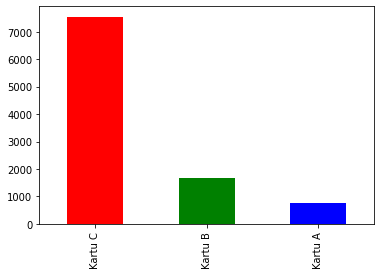

In [ ]:
df['product'].value_counts().plot(kind='bar', color=['red', 'green','blue'])
plt.show()

## Data Preprocessing

In [ ]:
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])

# alternatif lain
# f['product'].map({'Kartu A' : 0, 'Kartu B' : 1, 'Kartu C' : 2}).value_counts()

In [ ]:
df = df.drop('customer_id', axis=1)
df.shape

(10000, 14)

In [ ]:
scaler = MinMaxScaler()
n_df = pd.DataFrame(scaler.fit_transform(df))
n_df.columns = df.columns
n_df.head()


,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,0.0,0.001138,0.001957,0.0317,0.042926,0.038048,0.000440,0.000470,0.000000,0.002689,0.001897,1.000000,0.067946,0.0
1,0.0,0.001084,0.002129,0.0000,0.000000,0.000000,0.000000,0.003383,0.000000,0.000000,0.012785,0.866667,0.019527,0.0
2,0.0,0.003823,0.005387,0.0000,0.000000,0.000000,0.022256,0.020733,0.001094,0.005042,0.004736,1.000000,0.206235,0.0
3,0.0,0.000008,0.000087,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.011876,0.0
4,0.0,0.003909,0.006121,0.0000,0.000000,0.016304,0.030463,0.022987,0.000000,0.000000,0.011010,1.000000,0.102775,0.0


In [ ]:
X = n_df.iloc[:,:-1]
y = n_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=67, test_size=.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 13) (2000, 13) (8000,) (2000,)


In [ ]:
y.value_counts()

0.0    8000
1.0    2000
Name: churn, dtype: int64

In [ ]:
y_train.value_counts()

0.0    6400
1.0    1600
Name: churn, dtype: int64

In [ ]:
y_test.value_counts()

0.0    1600
1.0     400
Name: churn, dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluation

In [ ]:
print('Accuracy Score for Training Dataset = ', accuracy_score(y_train, knn.predict(X_train)))
print('Accuracy Score for Testing Dataset = ', accuracy_score(y_test, knn.predict(X_test)))

Accuracy Score for Training Dataset =  0.929375
Accuracy Score for Testing Dataset =  0.8995


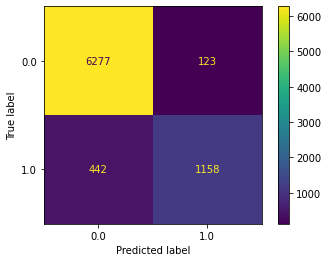

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plot_confusion_matrix(knn, X_train, y_train)
plt.show()

In [ ]:
1158/(1158+123)

0.9039812646370023

In [ ]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      6400
         1.0       0.90      0.72      0.80      1600

    accuracy                           0.93      8000
   macro avg       0.92      0.85      0.88      8000
weighted avg       0.93      0.93      0.93      8000



In [ ]:
2/(1/.90 + 1/.72)

0.8

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1600
         1.0       0.83      0.62      0.71       400

    accuracy                           0.90      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.90      0.90      0.89      2000



In [ ]:
acc_training = []
acc_test = []

for i in range(3,13,1):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)

  acc_training.append(accuracy_score(y_train, model.predict(X_train)))
  acc_test.append(accuracy_score(y_test, model.predict(X_test)))

In [ ]:
metr = pd.DataFrame({'k' : range(3,13), 'Training Accuracy' : acc_training, 'Testing Accuracy' : acc_test})
metr

,k,Training Accuracy,Testing Accuracy
0,3,0.99375,0.9010
1,4,0.99375,0.9005
2,5,0.99375,0.8985
3,6,0.99375,0.8970
4,7,0.99475,0.9010
5,8,0.99475,0.8995
6,9,0.99475,0.9015
7,10,0.99475,0.9000
8,11,0.99475,0.8995
9,12,0.99475,0.8975


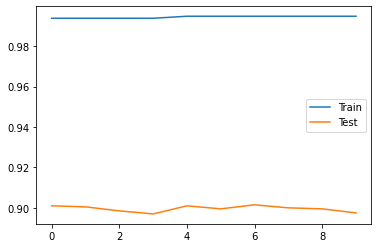

In [ ]:
plt.plot(metr['Training Accuracy'].values)
plt.plot(metr['Testing Accuracy'].values)
plt.legend(labels=['Train','Test'])
plt.show()


In [ ]:
plt.legend?